<a href="https://colab.research.google.com/github/HimaliShewale/Python/blob/main/Housing%20Price%20Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

  0% 0.00/432k [00:00<?, ?B/s]
100% 432k/432k [00:00<00:00, 115MB/s]
Archive:  housedata.zip
  inflating: data.csv                
  inflating: data.dat                
  inflating: output.csv              
4600
49
49


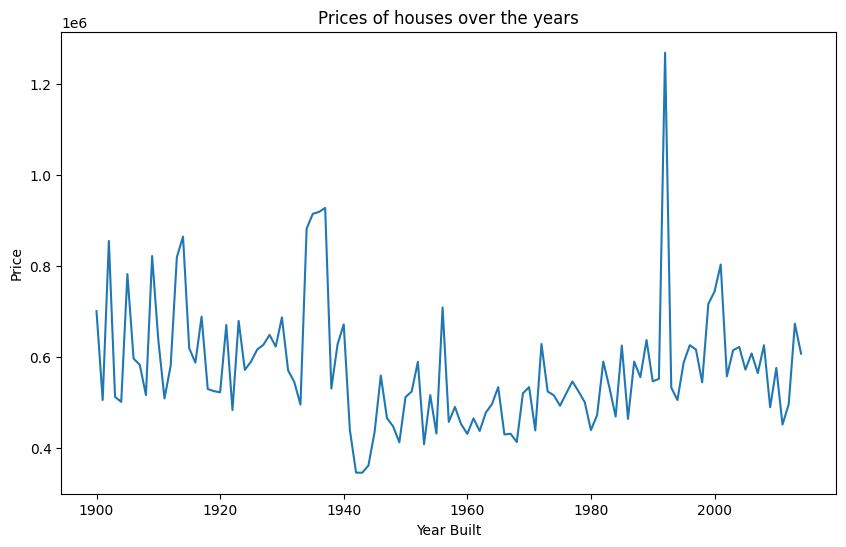

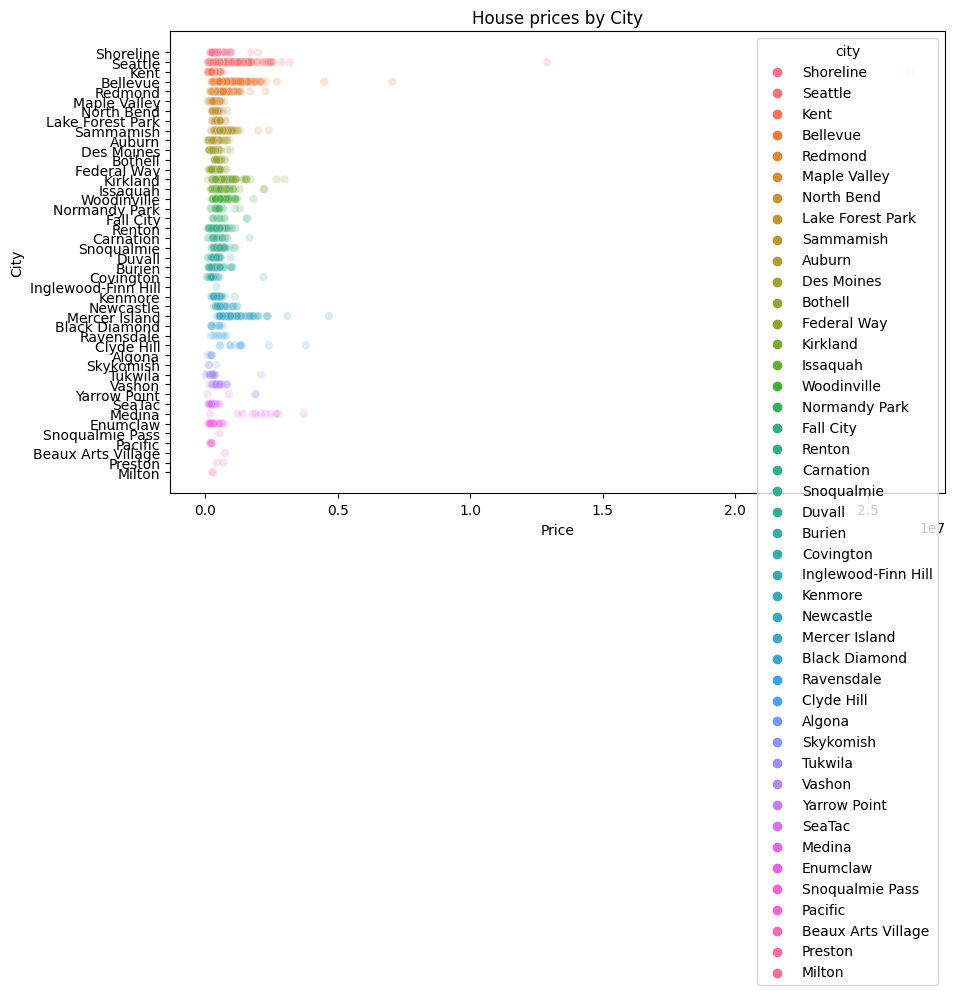

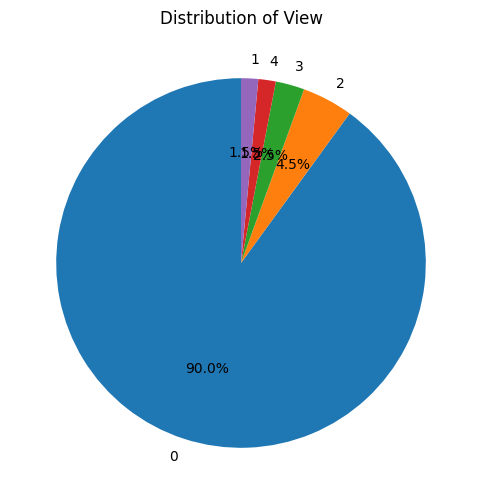

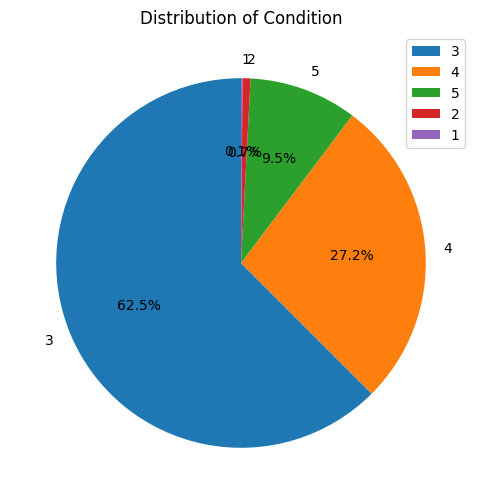

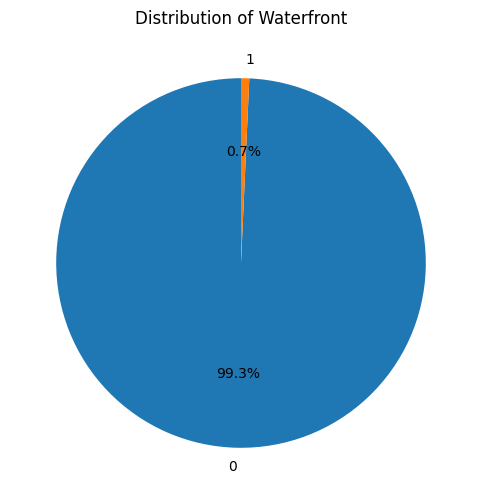

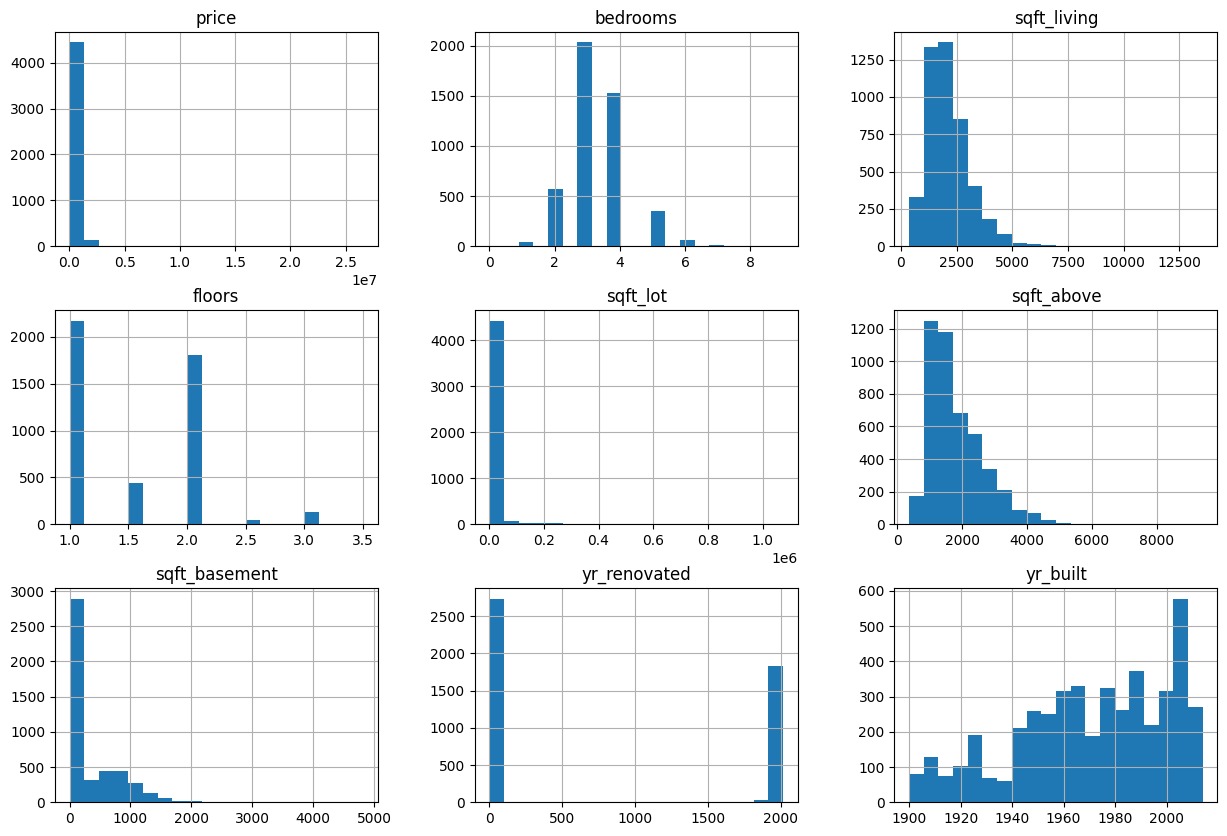

0


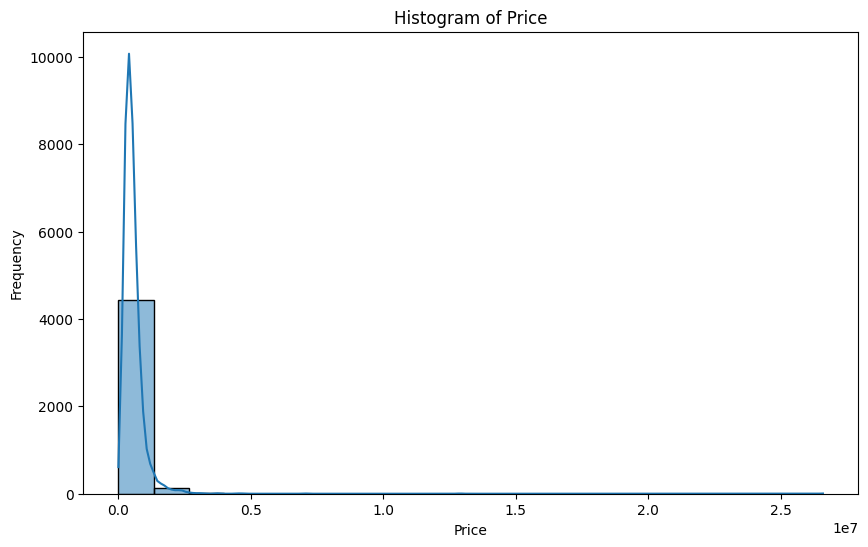

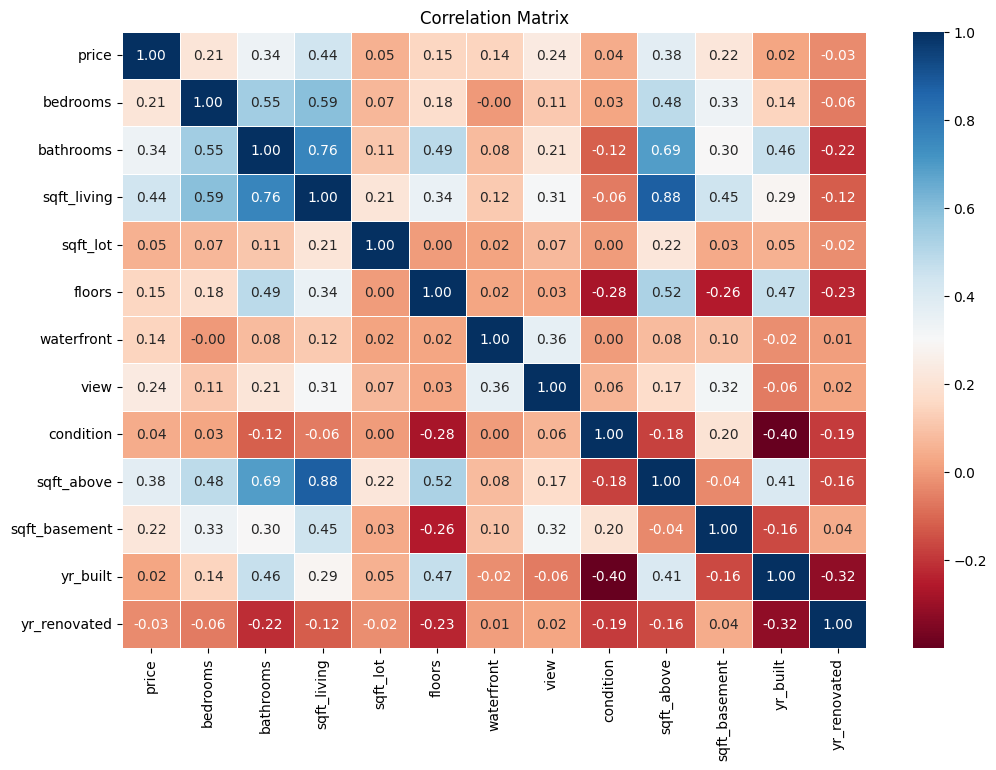

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.177e+13, tolerance: 5.870e+10
  model = cd_fast.enet_coordinate_descent(


RMSE of Lasso Regression: 749626.2519488161
RMSE of Random Forest: 768296.9049585541


In [ ]:
!pip install pandas numpy scikit-learn matplotlib kaggle

import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.linear_model import LassoCV, RidgeCV
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor


os.environ['KAGGLE_USERNAME'] = 'aishwariyachunduru'
os.environ['KAGGLE_KEY'] = '893ccea6d7d2d59961d5feaffe4afe1d'
dataset_url = "shree1992/housedata"

!kaggle datasets download -d $dataset_url
!unzip housedata.zip
house_data = pd.read_csv("data.csv")   ############ remove the error command before submission

# Number of records in the dataset
n = len(house_data)
print(n)


# Pre-processing steps
print(sum(house_data['price'] == 0))  # Count the number of zero values in the 'price' column
house_data['price'].replace(0, np.nan, inplace=True)  # Replace all zero values with NaN
print(sum(house_data['price'].isna()))  # Count the number of NaN values in the 'price' column
house_data['price'].fillna(house_data['price'].mean(), inplace=True)  # Replace all NaN values with the mean of the 'price' column

# Variation of prices over the years
avg_prices = house_data.groupby('yr_built')['price'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(x='yr_built', y='price', data=avg_prices)
plt.xlabel('Year Built')
plt.ylabel('Price')
plt.title('Prices of houses over the years')
plt.show()

# City

plt.figure(figsize=(10, 6))
sns.scatterplot(x='price', y='city', hue='city', data=house_data, alpha=0.2)
plt.xlabel('Price')
plt.ylabel('City')
plt.title('House prices by City')
plt.show()

# Pie chart for 'view'
view_counts = house_data['view'].value_counts()
plt.figure(figsize=(10, 6))
plt.pie(view_counts, labels=view_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of View')
plt.show()

# Pie chart for 'condition'
condition_counts = house_data['condition'].value_counts()
plt.figure(figsize=(10, 6))
plt.pie(condition_counts, labels=condition_counts.index, autopct='%1.1f%%', startangle=90)
plt.legend()
plt.title('Distribution of Condition')
plt.show()

# Pie chart for 'waterfront'
waterfront_counts = house_data['waterfront'].value_counts()
plt.figure(figsize=(10, 6))
plt.pie(waterfront_counts, labels=waterfront_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Waterfront')
plt.show()

# Histogram
quant_house_data = house_data[['price', 'bedrooms', 'sqft_living', 'floors', 'sqft_lot', 'sqft_above', 'sqft_basement', 'yr_renovated', 'yr_built']]
quant_house_data.hist(bins=20, figsize=(15, 10))
plt.show()

# Checking for missing values in the 'price' variable
print(sum(quant_house_data['price'].isna()))

# Creating a new dataset without missing values in the 'price' variable
quant_house_data_clean = quant_house_data.dropna()

# Creating a histogram of the 'price' variable without missing values
plt.figure(figsize=(10, 6))
sns.histplot(quant_house_data_clean['price'], bins=20, kde=True)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Histogram of Price')
plt.show()

# Correlation matrix
correlation_matrix = house_data[['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated']].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='RdBu', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# Transforming sqft basement - 1 if basement is there, 0 if basement is not there
house_data['sqft_basement'] = np.where(house_data['sqft_basement'] > 0, 1, 0)

# No missing data
print(house_data.isna().sum())

# Displaying details of the columns
print(house_data.info())

# Dropping date, street, city, statezip, country columns
house_data.drop(['date', 'street', 'city', 'statezip', 'country'], axis=1, inplace=True)

# Forward stepwise selection - to determine the predictors
X = house_data.drop('price', axis=1)
y = house_data['price']

# Linear Regression
lm = LinearRegression()
lm.fit(X, y)
lm_pred = lm.predict(X)
mse_linear_reg = mean_squared_error(y, lm_pred)
rmse_linear_reg = np.sqrt(mse_linear_reg)
print(f"RMSE of Linear Regression: {rmse_linear_reg}")

# Ridge Regression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
ridge = RidgeCV(alphas=np.logspace(-6, 6, 13))
ridge.fit(X_train, y_train)
ridge_pred = ridge.predict(X_test)
mse_ridge = mean_squared_error(y_test, ridge_pred)
rmse_ridge = np.sqrt(mse_ridge)
print(f"RMSE of Ridge Regression: {rmse_ridge}")

# Lasso Regression
lasso = LassoCV(alphas=np.logspace(-6, 6, 13), max_iter=1000)
lasso.fit(X_train, y_train)
lasso_pred = lasso.predict(X_test)
mse_lasso = mean_squared_error(y_test, lasso_pred)
rmse_lasso = np.sqrt(mse_lasso)
print(f"RMSE of Lasso Regression: {rmse_lasso}")

# Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=0)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
mse_rf = mean_squared_error(y_test, rf_pred)
rmse_rf = np.sqrt(mse_rf)
print(f"RMSE of Random Forest: {rmse_rf}")
